<H2>Machine Learning House Price Prediction</H2>

<h3><b>Problem Statement</b></h3>
   <p style="text-align: justify">
      Berdasarkan data pada Badan Pusat Statistik (BPS) dalam Survei Sosial Ekonomi (Susenas) Tahun 2023 mencatat kesenjangan angka kebutuhan rumah (backlog) kepemilikan rumah sepanjang tahun 2023 turun menjadi 9,9 juta unit dari tahun sebelumnya yaitu 10,5 juta unit. Angka backlog kelayakan hunian juga mengalami penurunan signifikan dari 16,14 juta unit (2022) menjadi 14,84 juta unit pada tahun 2023. Tren angka backlog kepemilikan rumah terus mengalami penurunan dari 12,75 juta unit pada tahun 2020 menjadi 12,72 unit di 2021. Angkanya berkurang lagi menjadi 10,51 juta unit pada tahun 2022 dan menjadi 9,95 juta unit di tahun 2023,” papar Direktur Jenderal Perumahan Kementerian Pekerjaan Umum dan Perumahan Rakyat (PUPR), Iwan Suprijanto, dalam paparannya yang dikutip Rabu, 13 Desember 2023. dari data yang sudah dipelajari kami mencoba untuk menganalisi alasan sebab data backlog tersebut mengalami penurunan, apakah karena harga rumah yang terbilang tinggi atau karena ketersediaan hunian layak nya kurang.
   </p>
   
<img src="tabel_backlog.png" alt="Deskripsi Foto">

   <p style="text-align: justify">
      Harga rumah dipengaruhi oleh berbagai faktor seperti lokasi geografis, luas tanah, jumlah kamar, fasilitas di sekitar, dan banyak lagi. Analisis manual terhadap kombinasi variabel-variabel ini menjadi rumit dan sulit dilakukan secara akurat. Dengan memanfaatkan teknik data science, kita dapat mengidentifikasi pola dan hubungan yang kompleks di antara variabel-variabel ini untuk membuat prediksi harga yang lebih tepat.
   </p>

<h3><b>Goals</b></h3>
   <p style="text-align: justify">
      Goals dari project akhir ini yaitu mengembangkan model sebuah model machine learning. Penggunaan teknik machine learning dalam proyek ini memungkinkan pengembangan model prediktif yang dapat "belajar" dari data historis. Dengan memanfaatkan algoritma-algoritma seperti regresi, random forest, atau neural networks, kita dapat meningkatkan akurasi prediksi dan menghasilkan model yang mampu menyesuaikan diri dengan perubahan tren pasar. </br></p>
   <p>
      Adapun data yang kami peroleh untuk project ini bersumber dari kaggle berupa data harga rumah di daerah jakarta, dengan sedikit modifikasi dan penyesuaian dengan algoritma yang akan dipakai adalah linear regression, KNN, Decision Tree. Adapun output dari model yang sudah dibuat berbentuk dashboard untuk memberikan inshigt terkait prediksi harga rumah.
   </p>

<b>Import Package</b>

In [2]:
#Mengimport library python
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
import bz2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

<b>Loading data</b>

In [3]:
#data source location
path_data_rumah = "C:\\Users\\SIBGALAH ILHAM\\Downloads\\CSA_house_price_Prediction\\Resources\\raw data\\daftar_harga_rumah\\DATA RUMAH.xlsx"

In [4]:
# open the data souce
data_rumah = pd.read_excel(path_data_rumah)

In [5]:
# Create the DataFrame dengan nama variabel df_data_rumah
#Features yang digunakan adalah 'Luas Bangunan/LB','Luas Tahan/LT','Kamar Tidur/KT','Kamar Mandi/KM','Garasi/GRS' dan 'harga'
df_data_rumah = pd.DataFrame(data_rumah)

<b>Data preprocessing</b>

In [6]:
#Melihat 10 baris teratas dari data
#Independent variabel(x) adalah LB, Lt, KT, KM, GRS
#Dependent variabel(y) adalah Harga
df_data_rumah.head(10)

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
5,6,Rumah Mewah Modern Murah 3 lantai di Tebet Jak...,4970000000,300,154,5,3,3
6,7,"Rumah lama di Tebet, dekat MT Haryono dan tol ...",2600000000,120,150,3,2,1
7,8,RUMAH BAGUS KEREN JALAN LEBAR DI AREA & KAWASA...,10500000000,350,247,4,4,0
8,9,Minimalis Baru Jalan 1 Mobil Akses Mudah Dekat...,3250000000,125,90,3,3,0
9,10,"Minimalis Baru Jalan 2 Mobil Tebet Timur, Tebe...",4500000000,250,96,5,4,1


In [7]:
# Melihat 10 baris terakhir dari data
df_data_rumah.tail(10)

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
1000,1001,Rumah Siap Huni 2lantai Akses 1mobil Di Asemba...,950000000,100,60,3,1,0
1001,1002,Rumah Baru Siap Huni Akses 2mobil Semi Furnise...,4500000000,128,90,3,3,1
1002,1003,Rumah Siap Huni Posisi Huk Akses 2mobil 200met...,7000000000,150,110,4,3,1
1003,1004,Rumah 2lantai Akses 2mobil Di Bukit Duri Tebet...,600000000,60,30,2,2,0
1004,1005,Rumah Strategis 100meter Ke Jl Supomo Di Mente...,2600000000,100,140,3,2,1
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0
1009,1010,Dijual Rumah Kokoh Di Gudang Peluru,10500000000,420,430,7,4,2


In [8]:
# Mengetahui jumlah kolom dan baris dari data
# Data kita mempunya 6 kolom (features) dengan 1010 baris
df_data_rumah.shape

(1010, 8)

In [9]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
#Dapat dilihat bahwa terdapat 6 kolom data yang berjenis numeric dan 1 kolom data berjenis kategorikal 
df_data_rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


In [10]:
df_data_rumah.HARGA.value_counts()

HARGA
3500000000     50
4000000000     31
3000000000     30
6500000000     30
5500000000     25
               ..
5750000128      1
3245000000      1
5899000000      1
25900000000     1
19000000000     1
Name: count, Length: 209, dtype: int64

In [11]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df_data_rumah.describe()

,NO,HARGA,LB,LT,KT,KM,GRS
count,1010.000000,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,505.500000,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,291.706188,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,1.000000,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,253.250000,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,505.500000,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,757.750000,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,1010.000000,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


<Axes: >

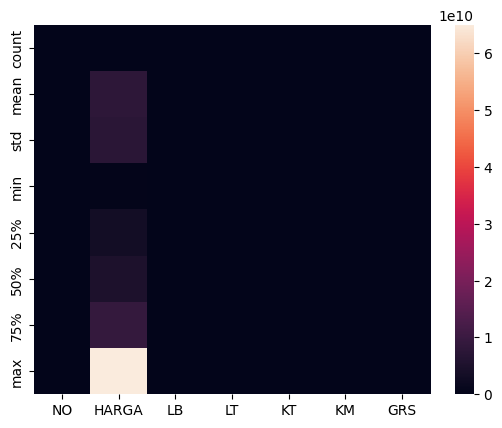

In [42]:
sns.heatmap(df_data_rumah.describe())

<b>Handling Missing Value</b>

In [13]:
#Mencari dan menangani missing values
#Ternyata data kita tidak ada missing values
df_data_rumah.isnull().sum()

NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64

In [14]:
#Pengecekan harga tertinggi
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_data_rumah):
    # Sort by column: 'HARGA' (descending)
    df_data_rumah = df_data_rumah.sort_values(['HARGA'], ascending=[False])
    return df_data_rumah

df_data_rumah_clean = clean_data(df_data_rumah.copy())
df_data_rumah_clean.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
283,284,Dijual Rumah Mnmls Ada Mini Swpool Tebet Jaksel,65000000000,300,200,5,7,4
470,471,Rumah Tua HITUNG TANAH TERMURAH di Area Komers...,55000000000,400,1075,4,3,4
474,475,"Rumah Lama Di Prime Area Tebet, Komersial",55000000000,1126,1224,4,4,2
122,123,Rumah baru lux furnish di kawasan elit tebet j...,42000000000,850,600,5,5,5
751,752,House In Dukuh Patra,42000000000,600,624,3,3,2


In [15]:
df_data_rumah_clean

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
283,284,Dijual Rumah Mnmls Ada Mini Swpool Tebet Jaksel,65000000000,300,200,5,7,4
470,471,Rumah Tua HITUNG TANAH TERMURAH di Area Komers...,55000000000,400,1075,4,3,4
474,475,"Rumah Lama Di Prime Area Tebet, Komersial",55000000000,1126,1224,4,4,2
122,123,Rumah baru lux furnish di kawasan elit tebet j...,42000000000,850,600,5,5,5
751,752,House In Dukuh Patra,42000000000,600,624,3,3,2
...,...,...,...,...,...,...,...,...
204,205,Rumah Murah Siap Huni di Jl. Palbatu III Tebet,690000000,90,50,3,1,0
921,922,Rumah seken di Asem baris dekat St. cawang,650000000,50,55,2,1,0
1003,1004,Rumah 2lantai Akses 2mobil Di Bukit Duri Tebet...,600000000,60,30,2,2,0
680,681,Rumah Murah 2 Lantai Tebet,600000000,60,30,2,1,0


In [16]:
df_data_rumah_clean["HARGA_JUTA"] = df_data_rumah_clean['HARGA']//1000000

<h2>Exploratory Data Analysis (EDA)</h2>

<b>Plotting data</b>

Text(0.5, 1.0, 'Harga(Juta) - Jumlah Garasi')

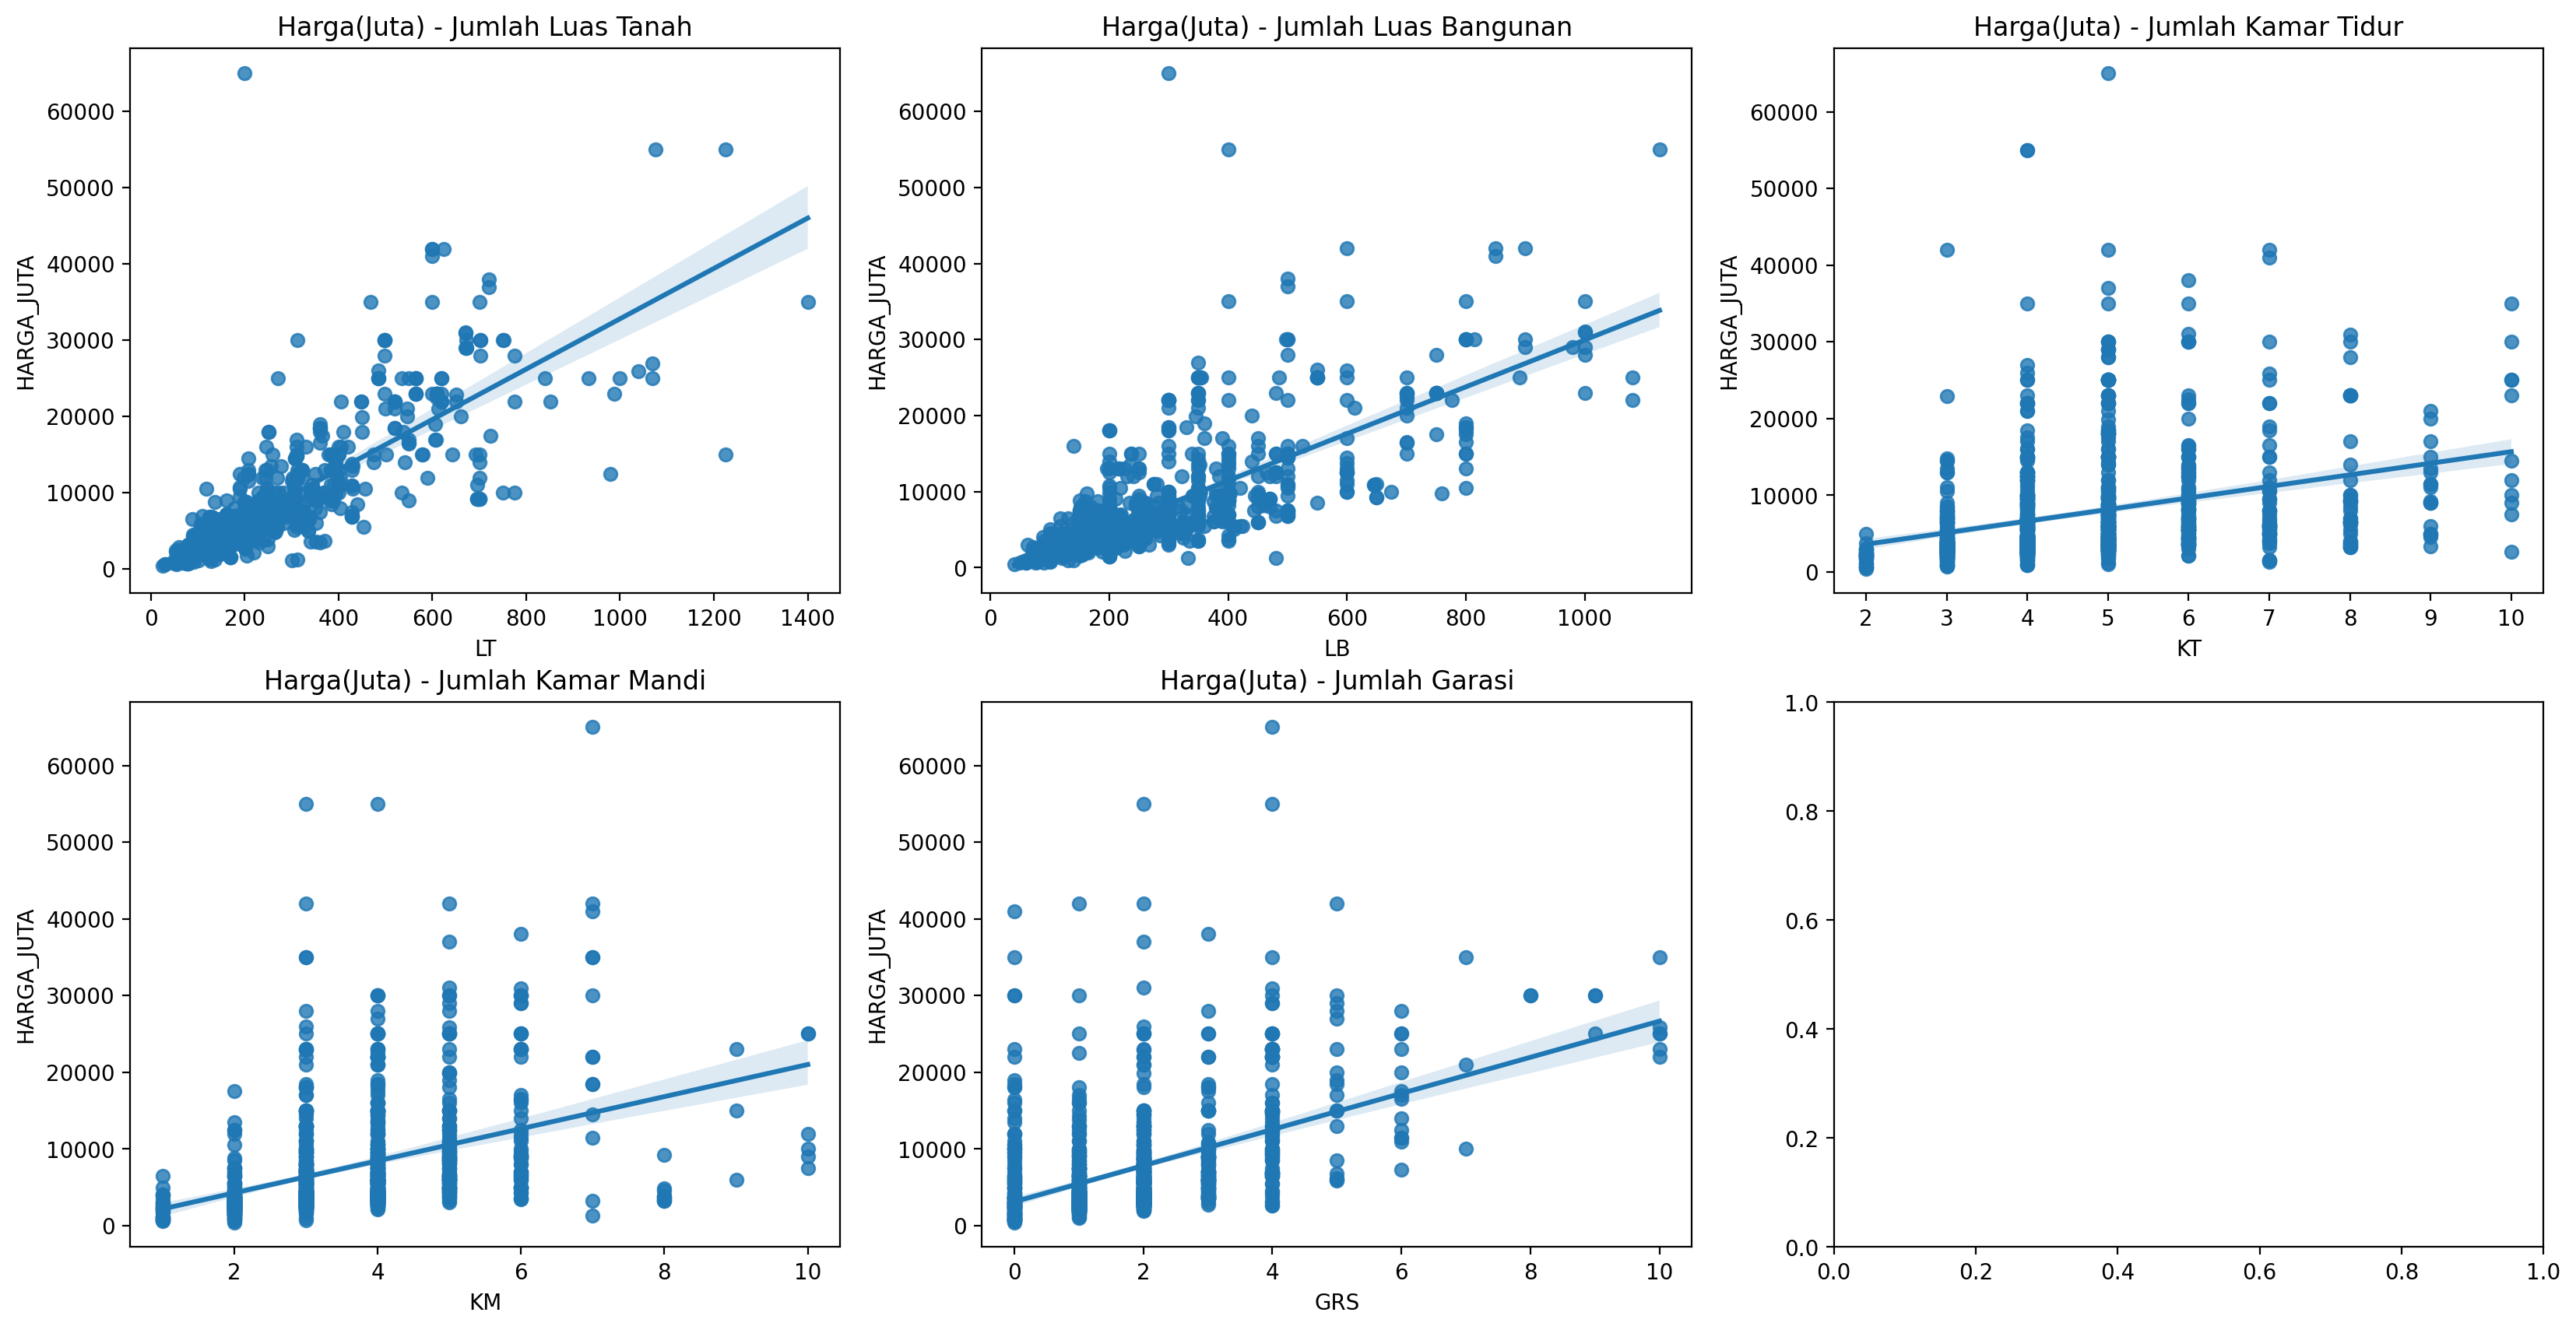

In [17]:
# perbandingan harga dengan beberapa atribut
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20,10,), dpi=200)
sns.regplot(df_data_rumah_clean, x="LT", y="HARGA_JUTA", ax=axs[0][0]).set_title("Harga(Juta) - Jumlah Luas Tanah")
sns.regplot(df_data_rumah_clean, x="LB", y="HARGA_JUTA", ax=axs[0][1]).set_title("Harga(Juta) - Jumlah Luas Bangunan")
sns.regplot(df_data_rumah_clean, x="KT", y="HARGA_JUTA", ax=axs[0][2]).set_title("Harga(Juta) - Jumlah Kamar Tidur")
sns.regplot(df_data_rumah_clean, x="KM", y="HARGA_JUTA", ax=axs[1][0]).set_title("Harga(Juta) - Jumlah Kamar Mandi")
sns.regplot(df_data_rumah_clean, x="GRS", y="HARGA_JUTA", ax=axs[1][1]).set_title("Harga(Juta) - Jumlah Garasi")


Dari Plot diatas diketahui bahwa hubungan linier pada harga dengan atribut Luas Tanah dan Luas Bangunan sangat berpengaruh

<function matplotlib.pyplot.show(close=None, block=None)>

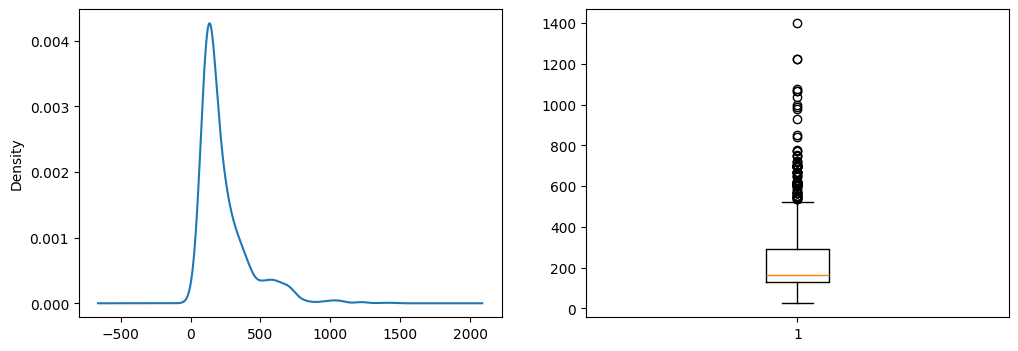

In [18]:
# melakukan univariat analysis terhadap variabel luas tanah (LT)
# melihat distribusi data LT
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df_data_rumah_clean['LT'].plot(kind=('kde'))

f.add_subplot(1,2,2)
plt.boxplot(df_data_rumah_clean['LT'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

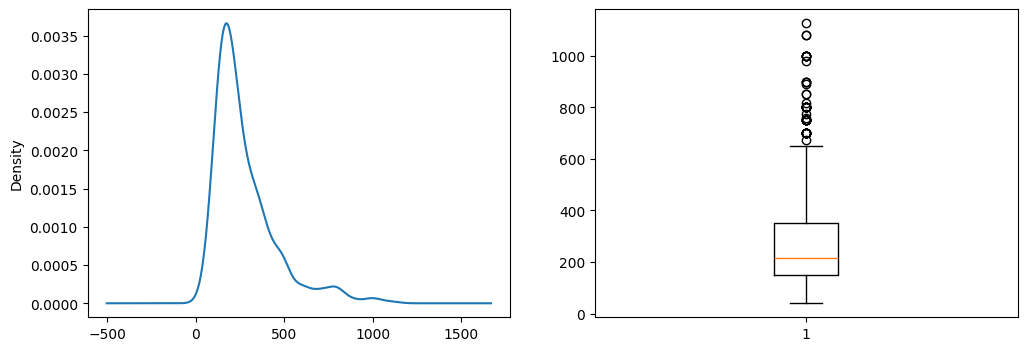

In [19]:
# melakukan univariat analysis terhadap variabel luas Bangungan (LB)
# melihat distribusi data LB
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df_data_rumah_clean['LB'].plot(kind=('kde'))

f.add_subplot(1,2,2)
plt.boxplot(df_data_rumah_clean['LB'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

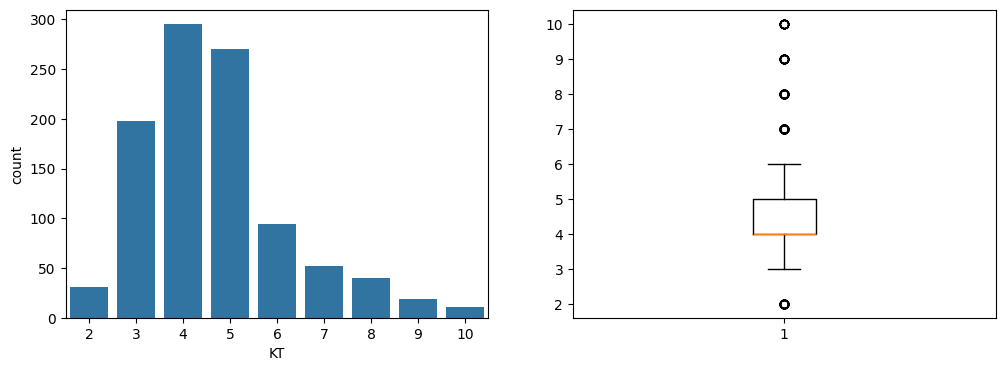

In [20]:
# melakukan univariat analysis terhadap variabel kamar tidur (KT)
# melihat distribusi data KT

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df_data_rumah_clean, x="KT")

f.add_subplot(1,2,2)
plt.boxplot(df_data_rumah_clean['KT'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

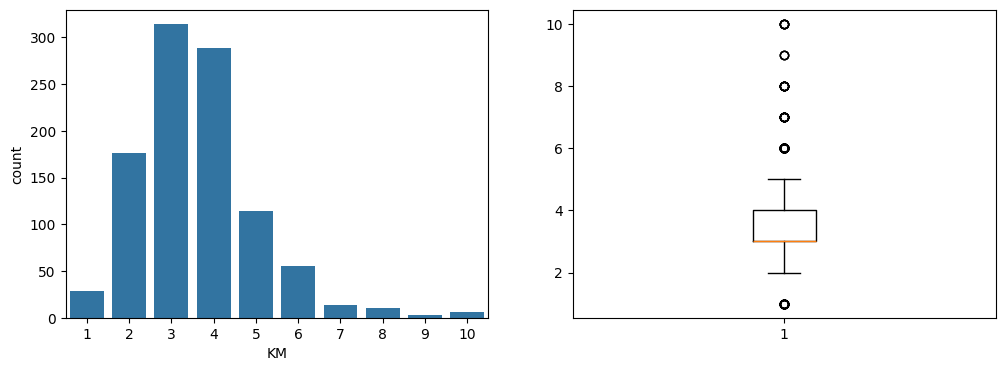

In [21]:
# melakukan univariat analysis terhadap variabel kamar mandi (KM)
# melihat distribusi data KM

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df_data_rumah_clean, x="KM")

f.add_subplot(1,2,2)
plt.boxplot(df_data_rumah_clean['KM'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

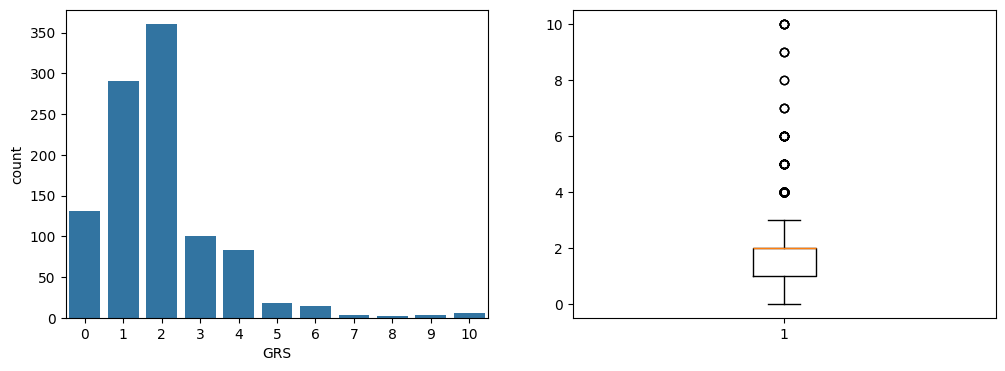

In [22]:
# melakukan univariat analysis terhadap variabel jumlah garasi (GRS)
# melihat distribusi data GRS

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df_data_rumah_clean, x="GRS")

f.add_subplot(1,2,2)
plt.boxplot(df_data_rumah_clean['GRS'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1800x800 with 0 Axes>

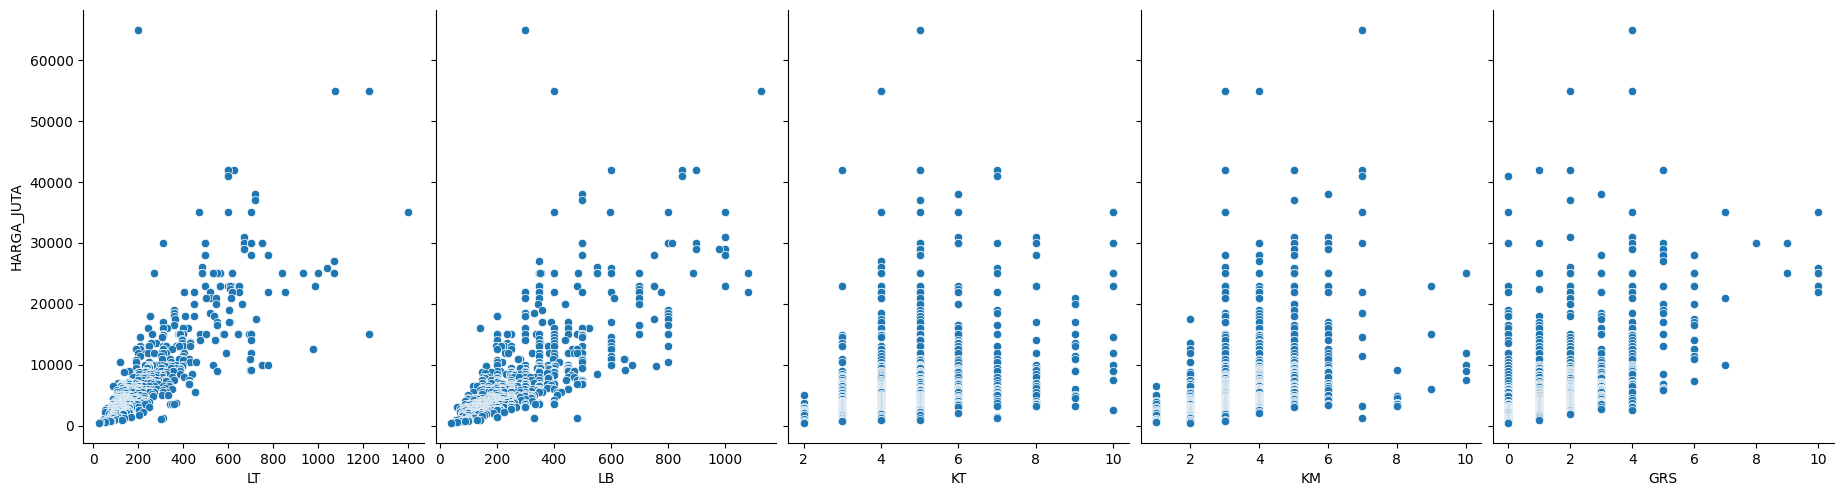

In [23]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot

plt.figure(figsize=(18,8))
sns.pairplot(data=df_data_rumah_clean, x_vars=["LT", "LB", "KT", "KM", "GRS"], y_vars="HARGA_JUTA", height=5, aspect=0.75)
plt.show

In [24]:
df_harga_rumah = df_data_rumah_clean.drop(columns=['NAMA RUMAH','NO', 'HARGA'])

In [25]:
df_harga_rumah

,LB,LT,KT,KM,GRS,HARGA_JUTA
283,300,200,5,7,4,65000
470,400,1075,4,3,4,55000
474,1126,1224,4,4,2,55000
122,850,600,5,5,5,42000
751,600,624,3,3,2,42000
...,...,...,...,...,...,...
204,90,50,3,1,0,690
921,50,55,2,1,0,650
1003,60,30,2,2,0,600
680,60,30,2,1,0,600


In [26]:
# mengetahui nilai korelasi dari independent variabel dan dependent variabel
df_harga_rumah.corr().style.background_gradient()

,LB,LT,KT,KM,GRS,HARGA_JUTA
LB,1.000000,0.740341,0.443578,0.529889,0.492331,0.747083
LT,0.740341,1.000000,0.425484,0.388504,0.484394,0.809617
KT,0.443578,0.425484,1.000000,0.669457,0.280445,0.323320
KM,0.529889,0.388504,0.669457,1.000000,0.345323,0.404770
GRS,0.492331,0.484394,0.280445,0.345323,1.000000,0.484892
HARGA_JUTA,0.747083,0.809617,0.323320,0.404770,0.484892,1.000000


<b>Modelling</b>

In [27]:
# recall data
df_harga_rumah.head()

,LB,LT,KT,KM,GRS,HARGA_JUTA
283,300,200,5,7,4,65000
470,400,1075,4,3,4,55000
474,1126,1224,4,4,2,55000
122,850,600,5,5,5,42000
751,600,624,3,3,2,42000


In [28]:
# penentuan variabel x dan y
x = df_harga_rumah.drop(columns='HARGA_JUTA', axis=1)
y = df_harga_rumah['HARGA_JUTA']

<b>Membuat pipelines</b>

In [29]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),
                                        ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),
                                           ('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),
                                        ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),
                                         ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),
                                          ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),
                                         ('SVR', SVR())])))


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

def modeling(models):
    for name, model in models:
        kfold = KFold(n_splits=10)
        results = cross_val_score(model, x_train, y_train, cv = kfold, scoring='r2')
        print(f'{name} = {results.mean()}')

In [30]:
modeling(pipelines)

ScaledLR = 0.7185286761458
ScaledLASSO = 0.7185644346994252


ScaledEN = 0.6862855363947709
ScaledKNN = 0.6725173658745923
ScaledCART = 0.4280302065739495
ScaledSVR = -0.1332457921894246


In [31]:
# cek shape dari data test dan data training
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(707, 5)
(707,)
(303, 5)
(303,)


In [32]:
lin_reg = LinearRegression()

In [33]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [34]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[  11.48109447   26.28523425 -835.8898028   704.2802532   197.13822744]
-717.7919922396522


In [35]:
coef_dict = {
    'features': x.columns,
    'coef_value' : lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef

,features,coef_value
0,LB,11.481094
1,LT,26.285234
2,KT,-835.889803
3,KM,704.280253
4,GRS,197.138227


In [36]:
y_pred = lin_reg.predict(x_test)

In [37]:
lin_reg.score(x_test, y_test)

0.721852027144732

In [38]:
# prediksi model
lin_reg.predict([[50,25,2,2,0]])

c:\Users\SIBGALAH ILHAM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([250.17448834])

In [39]:
# download model
import pickle
with open('house_price_prediction.sav','wb') as r:
    pickle.dump(lin_reg,r)

In [40]:
# loadtest model
with open('house_price_prediction.sav','rb') as r:
    price_house = pickle.load(r)

In [41]:
price_house.predict([[50,25,2,2,0]])

c:\Users\SIBGALAH ILHAM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([250.17448834])